In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


df = pd.read_excel("DS1_C4_S9_Car_Data.xlsx")



# Preprocessings

In [3]:
# Clean column names
df.columns = df.columns.str.strip()  # Remove any leading/trailing whitespace
df.columns = df.columns.str.lower()  # Convert to lowercase
df.columns = df.columns.str.replace(' ', '_') 
df.columns = df.columns.str.replace('_mm', '') 
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)  # Remove special characters
df.columns = df.columns.str.replace('__', '_')  # Replace double underscores
df.columns = df.columns.str.rstrip('_')  # Remove trailing underscores

In [4]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()

table = {
    "Numerical": numerical_cols,
    "Categorical": categorical_cols
}


print(tabulate(table, headers="keys", tablefmt="psql"))


+--------------------------+-----------------------------+
| Numerical                | Categorical                 |
|--------------------------+-----------------------------|
| s_no                     | make                        |
| displacement             | model                       |
| cylinders                | variant                     |
| valves_per_cylinder      | fuel_type                   |
| fuel_tank_capacity_litre | body_type                   |
| height                   | kerb_weight                 |
| length                   | central_locking             |
| width                    | child_safety_locks          |
| doors                    | hill_assist                 |
| city_mileage_km_litre    | drive_modes                 |
| highway_mileage_km_litre | high_speed_alert_system     |
| power                    | abs_antilock_braking_system |
| torque                   | gross_vehicle_weight        |
| seating_capacity         | airbags                    

In [5]:
# Numerical columns - fill with median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Categorical columns - fill with "Not Available"
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        if col in ['airbags', 'central_locking', 'child_safety_locks']:
            # For safety features, assume 'No' if not specified
            df[col].fillna('No', inplace=True)
        else:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)


C:\Users\subha\AppData\Local\Temp\ipykernel_12352\1499229415.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\subha\AppData\Local\Temp\ipykernel_12352\1499229415.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

# Task 1

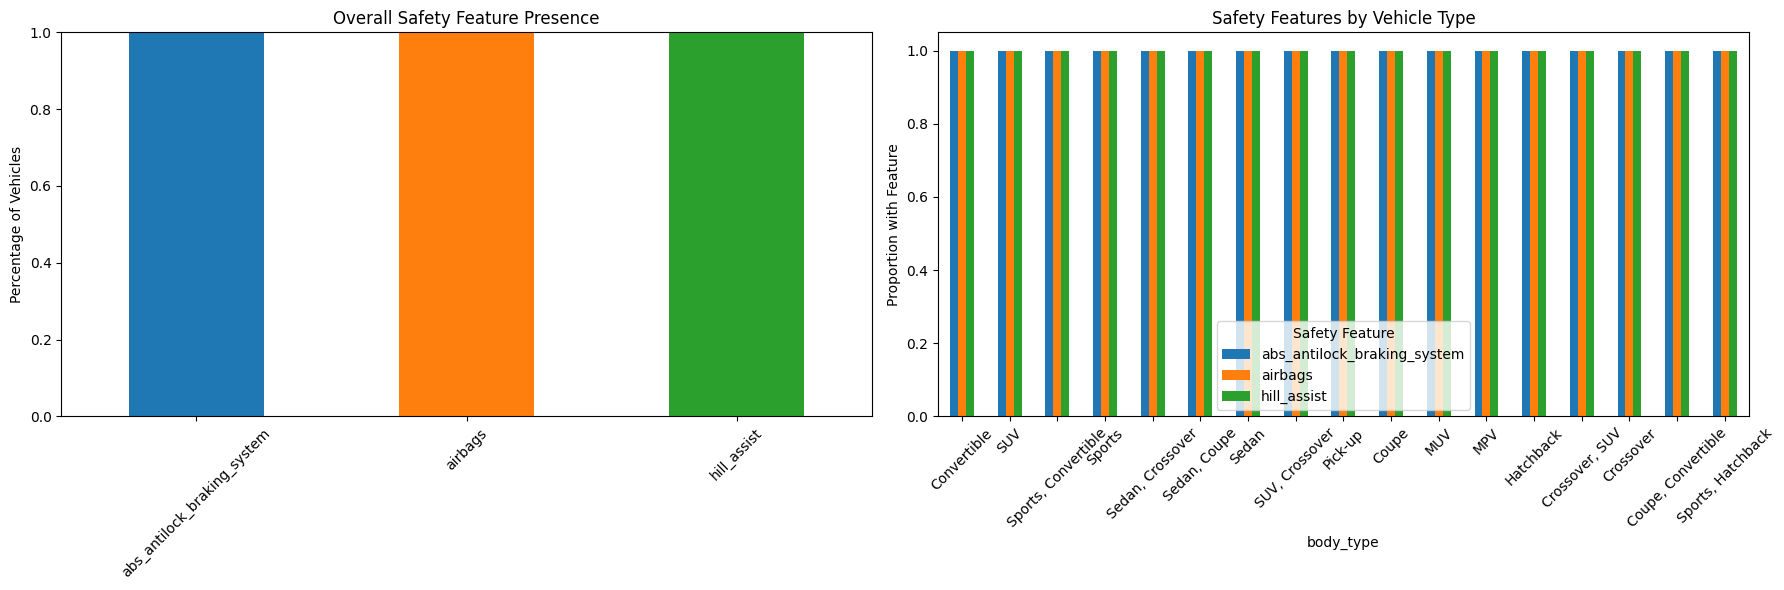

In [11]:

"""Task 1: Safety Feature Assessment
Examine the presence of safety features such as ABS, airbags,
and hill assist, to assess the safety standards of various car
models with respect to each feature mentioned above."""


# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)

# List of safety features to analyze
safety_features = [
    'abs_antilock_braking_system',
    'airbags',
    'hill_assist'
]

# Convert safety features to Yes/No format
for feature in safety_features:
    if feature in df.columns:
        df[feature] = df[feature].apply(lambda x: 'Yes' if pd.notna(x) and str(x).strip() != '' else 'No')
    else:
        df[feature] = 'No'

# 1. Calculate overall safety feature presence
safety_summary = df[safety_features].apply(lambda x: x.value_counts(normalize=True)).T

# 2. Safety features by vehicle type (if column exists)
if 'body_type' in df.columns:
    type_safety = df.groupby('body_type')[safety_features].apply(
        lambda x: x.apply(lambda y: (y == 'Yes').mean())
    ).sort_values(by=safety_features[0], ascending=False)

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Overall feature presence
safety_summary['Yes'].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=axes[0])
axes[0].set_title('Overall Safety Feature Presence')
axes[0].set_ylabel('Percentage of Vehicles')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Feature presence by vehicle type (if data exists)
if 'body_type' in df.columns:
    type_safety.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    axes[1].set_title('Safety Features by Vehicle Type')
    axes[1].set_ylabel('Proportion with Feature')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(title='Safety Feature')
else:
    axes[1].axis('off')  # Hide if no body_type data


plt.tight_layout()
plt.show()

# Task 2

In [7]:

comfort_features = [
    'seating_capacity',
    'central_locking',
    'child_safety_locks'
]

df['seating_capacity'] = pd.to_numeric(df['seating_capacity'], errors='coerce').fillna(0)

df['central_locking'] = df['central_locking'].apply(lambda x: 'Yes' if pd.notna(x) and str(x).strip() != '' else 'No')

df['child_safety_locks'] = df['child_safety_locks'].apply(lambda x: 'Yes' if pd.notna(x) and str(x).strip() != '' else 'No')

# 1. Calculate average seating capacity by model
avg_seating_capacity = df.groupby('model')['seating_capacity'].mean().sort_values(ascending=False)

comfort_by_make = df.groupby('make')[['central_locking', 'child_safety_locks']].apply(
    lambda x: x.apply(lambda y: (y == 'Yes').sum())
).sort_values(by=['central_locking', 'child_safety_locks'], ascending=False)

comfort_summary = pd.concat([avg_seating_capacity, comfort_by_make], axis=1)
comfort_summary.columns = ['avg_seating', 'central_locking_count', 'child_lock_count']


print(comfort_summary.head(10))



                   avg_seating  central_locking_count  child_lock_count
Winger               16.000000                    NaN               NaN
Tuv300 Plus           9.000000                    NaN               NaN
Extreme               8.454545                    NaN               NaN
Scorpio               8.111111                    NaN               NaN
Gypsy                 8.000000                    NaN               NaN
Marazzo               7.500000                    NaN               NaN
Bolero Power Plus     7.333333                    NaN               NaN
Innova Crysta         7.312500                    NaN               NaN
Lodgy                 7.285714                    NaN               NaN
Xylo                  7.200000                    NaN               NaN


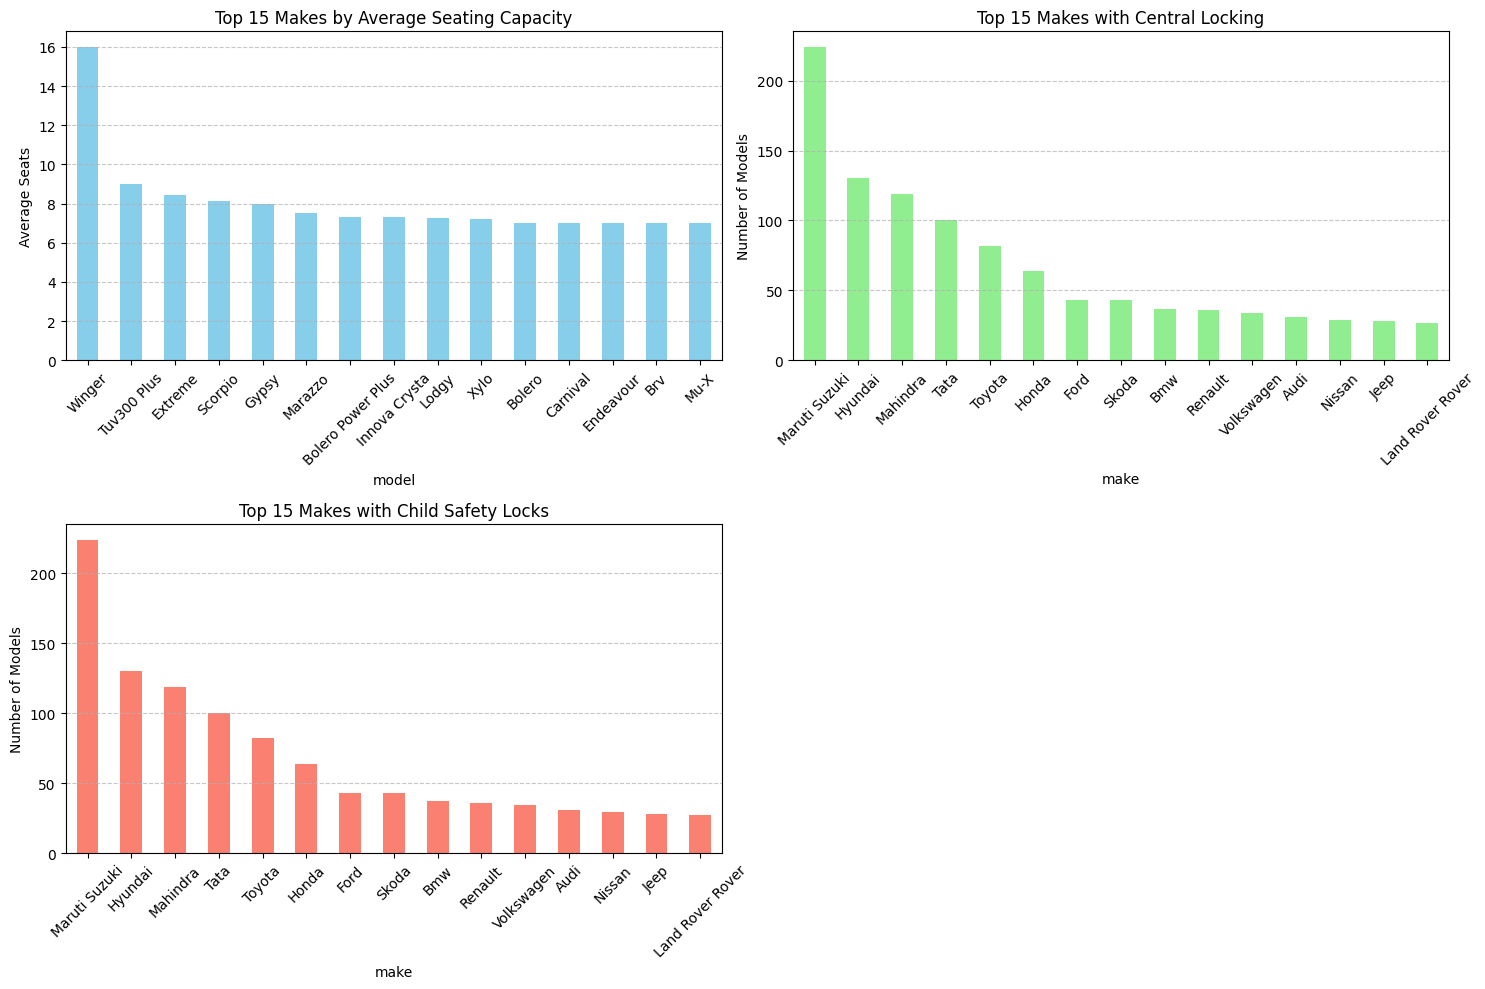

In [8]:

# Visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Average seating capacity by make (top 15)
plt.subplot(2, 2, 1)
avg_seating_capacity.head(15).plot(kind='bar', color='skyblue')
plt.title('Top 15 Makes by Average Seating Capacity')
plt.ylabel('Average Seats')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Central locking prevalence by make (top 15)
plt.subplot(2, 2, 2)
comfort_by_make['central_locking'].head(15).plot(kind='bar', color='lightgreen')
plt.title('Top 15 Makes with Central Locking')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Child safety lock prevalence by make (top 15)
plt.subplot(2, 2, 3)
comfort_by_make['child_safety_locks'].head(15).plot(kind='bar', color='salmon')
plt.title('Top 15 Makes with Child Safety Locks')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


# Task 3

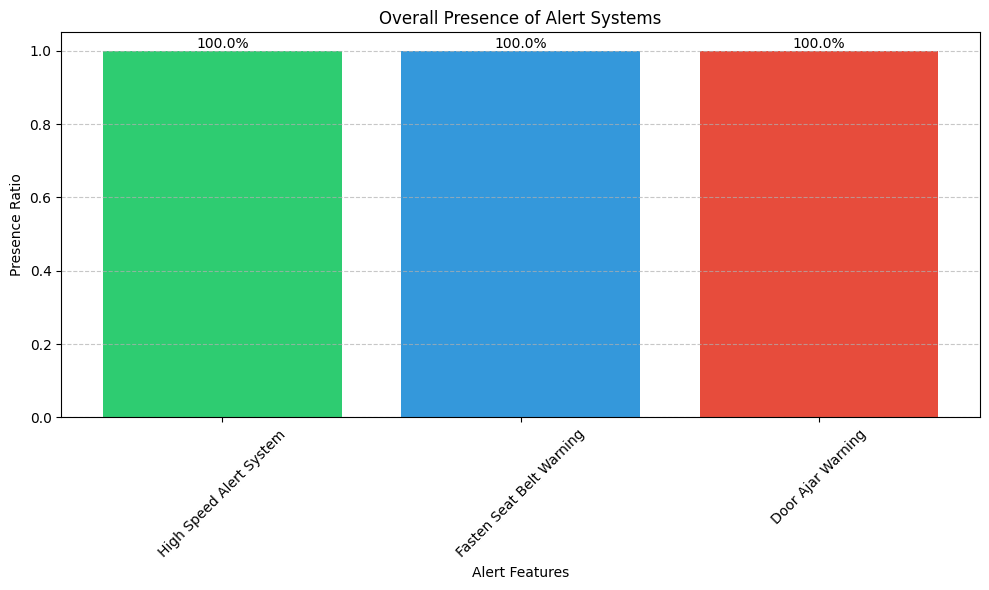

<Figure size 1200x600 with 0 Axes>

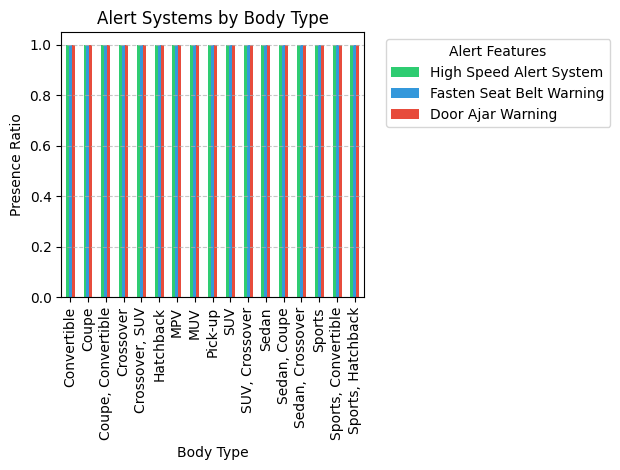


Alert Systems Analysis Summary

1. Overall Presence of Alert Features:
high_speed_alert_system     100.0%
fasten_seat_belt_warning    100.0%
door_ajar_warning           100.0%
dtype: object

2. Top 5 Manufacturers by Average Alert Features:
make
Aston Martin     100.0%
Mitsubishi       100.0%
Lexus            100.0%
Mahindra         100.0%
Maruti Suzuki    100.0%
dtype: object

3. Body Types by Average Alert Features:
body_type
Convertible            100.0%
SUV                    100.0%
Sports, Convertible    100.0%
Sports                 100.0%
Sedan, Crossover       100.0%
Sedan, Coupe           100.0%
Sedan                  100.0%
SUV, Crossover         100.0%
Pick-up                100.0%
Coupe                  100.0%
MUV                    100.0%
MPV                    100.0%
Hatchback              100.0%
Crossover, SUV         100.0%
Crossover              100.0%
Coupe, Convertible     100.0%
Sports, Hatchback      100.0%
dtype: object


In [9]:

# Define alert system features
alert_features = [
    'high_speed_alert_system',
    'fasten_seat_belt_warning',
    'door_ajar_warning'
]

# Function to clean and prepare alert system data
def prepare_alert_data(df, features):
    for feature in features:
        if feature in df.columns:
            df[feature] = df[feature].apply(
                lambda x: 'Yes' if pd.notna(x) and str(x).strip() != '' else 'No'
            )
        else:
            df[feature] = 'No'
    return df

# Function to analyze alert systems
def analyze_alert_systems(df, features):
    # Overall presence of alert features
    overall_presence = df[features].apply(
        lambda x: (x == 'Yes').mean()
    ).round(3)

    # Alert features by make
    make_presence = df.groupby('make')[features].apply(
        lambda x: (x == 'Yes').mean()
    ).round(3)

    # Alert features by body type
    body_presence = df.groupby('body_type')[features].apply(
        lambda x: (x == 'Yes').mean()
    ).round(3)

    return overall_presence, make_presence, body_presence

# Function to create visualizations
def plot_alert_analysis(overall_presence, make_presence, body_presence):
    # 1. Overall Alert Features Presence
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(overall_presence)), 
                  overall_presence.values,
                  color=['#2ecc71', '#3498db', '#e74c3c'])
    plt.title('Overall Presence of Alert Systems')
    plt.xlabel('Alert Features')
    plt.ylabel('Presence Ratio')
    plt.xticks(range(len(overall_presence)), 
               [feat.replace('_', ' ').title() for feat in overall_presence.index],
               rotation=45)
    
    # Add percentage labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}',
                ha='center', va='bottom')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


    # 3. Alert Systems by Body Type
    plt.figure(figsize=(12, 6))
    body_presence.plot(kind='bar',
                      color=['#2ecc71', '#3498db', '#e74c3c'])
    plt.title('Alert Systems by Body Type')
    plt.xlabel('Body Type')
    plt.ylabel('Presence Ratio')
    plt.legend(title='Alert Features', 
              bbox_to_anchor=(1.05, 1),
              labels=[feat.replace('_', ' ').title() for feat in alert_features])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Function to print summary statistics
def print_alert_summary(overall_presence, make_presence, body_presence):
    print("\nAlert Systems Analysis Summary")
    print("\n1. Overall Presence of Alert Features:")
    print(overall_presence.apply(lambda x: f"{x:.1%}"))
    
    print("\n2. Top 5 Manufacturers by Average Alert Features:")
    avg_by_make = make_presence.mean(axis=1).sort_values(ascending=False)
    print(avg_by_make.head().apply(lambda x: f"{x:.1%}"))
    
    print("\n3. Body Types by Average Alert Features:")
    avg_by_body = body_presence.mean(axis=1).sort_values(ascending=False)
    print(avg_by_body.apply(lambda x: f"{x:.1%}"))


df = prepare_alert_data(df, alert_features)

# Analyze data
overall_presence, make_presence, body_presence = analyze_alert_systems(df, alert_features)

# Create visualizations
plot_alert_analysis(overall_presence, make_presence, body_presence)

# Print summary
print_alert_summary(overall_presence, make_presence, body_presence)




# Task 4

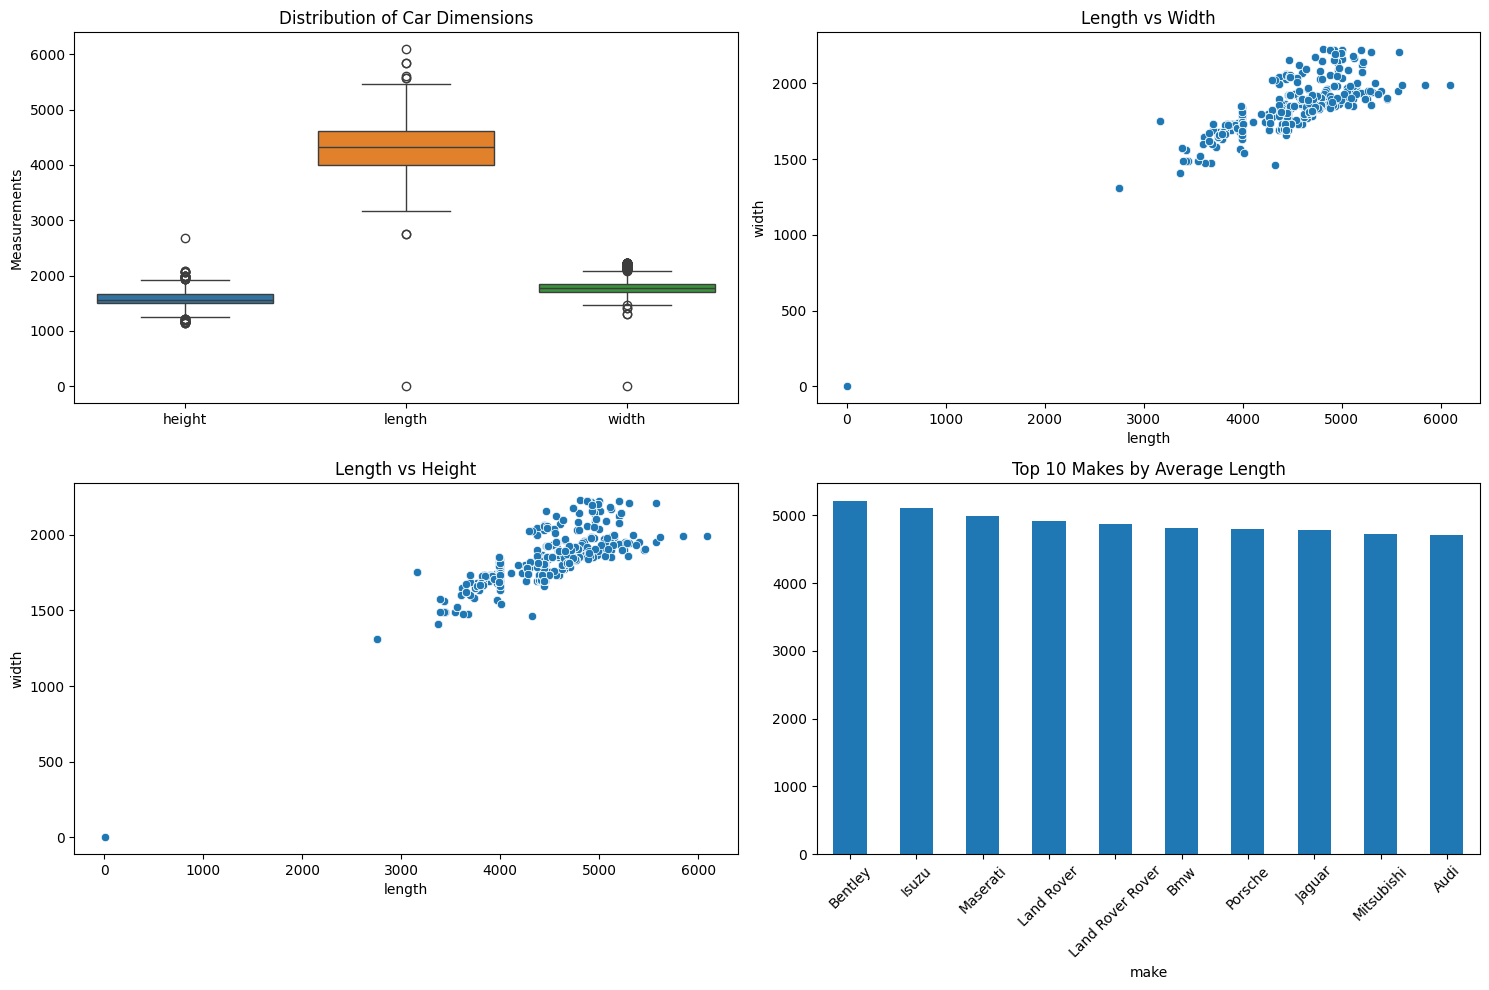


Overall Dimension Statistics:
            height       length        width
count  1276.000000  1276.000000  1276.000000
mean   1592.511755  4296.883730  1788.376050
std     151.612992   476.612977   150.231161
min    1136.000000     4.640000     1.840000
25%    1495.000000  3991.750000  1698.000000
50%    1557.000000  4331.000000  1770.000000
75%    1666.000000  4620.000000  1850.500000
max    2670.000000  6092.000000  2226.000000

Make-wise Average Dimensions:
                       height       length        width
make                                                   
Aston Martin      1294.333333  4623.000000  1982.333333
Audi              1543.612903  4715.096774  1875.838710
Bajaj             1652.000000  2752.000000  1312.000000
Bentley           1563.666667  5210.166667  2140.666667
Bmw               1541.486486  4816.891892  1980.243243
Bugatti           1212.000000  4544.000000  2038.000000
Datsun            1520.600000  3644.400000  1605.600000
Dc                1200.000000

In [10]:

# Analyze dimensions
def analyze_car_dimensions(df):
    # Basic statistics for dimensions
    dim_stats = df[['height', 'length', 'width']].describe()
    
    # Create make-wise dimension summaries
    make_dims = df.groupby('make')[['height', 'length', 'width']].mean()
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Box plots for dimensions
    sns.boxplot(data=df[['height', 'length', 'width']], ax=axes[0,0])
    axes[0,0].set_title('Distribution of Car Dimensions')
    axes[0,0].set_ylabel('Measurements')
    
    # Scatter plot: length vs width
    sns.scatterplot(data=df, x='length', y='width', ax=axes[0,1])
    axes[0,1].set_title('Length vs Width')
    
    # Scatter plot: length vs height
    sns.scatterplot(data=df,x='length', y='width', ax=axes[1,0])
    axes[1,0].set_title('Length vs Height')
    
    # Top 10 makes by average length
    make_dims['length'].sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Top 10 Makes by Average Length')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return dim_stats, make_dims

# Run the analysis
dim_stats, make_dims = analyze_car_dimensions(df)

# Display the results
print("\nOverall Dimension Statistics:")
print(dim_stats)
print("\nMake-wise Average Dimensions:")
print(make_dims)
